# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import t

# Leitura de dados

In [2]:
df = pd.read_excel("Base_Juridico.xlsx", sheet_name=1)
df.head()

,Sentença,Data_Julgamento,Região da Comarca,Tipo de Estratégia,Taxa Contratada,Valor Indenização
0,1,2019-07-01,Oeste,Estrategia C,3.1,0.000000
1,1,2019-07-01,Norte,Estrategia C,2.5,0.000000
2,0,2019-07-02,Sul,Estrategia A,4.0,2247.437094
3,1,2019-07-02,Sul,Estrategia B,2.6,0.000000
4,1,2019-07-03,Oeste,Estrategia B,4.1,0.000000


In [3]:
print('Número de Linhas: ', df.shape[0])
print('Número de Colunas: ', df.shape[1])

Número de Linhas:  450
Número de Colunas:  6


In [4]:
df.dtypes

Sentença                       int64
Data_Julgamento       datetime64[ns]
Região da Comarca             object
Tipo de Estratégia            object
Taxa Contratada              float64
Valor Indenização            float64
dtype: object

# Análise Exploratória

## Sentença

In [5]:
sentenca_fa = df['Sentença'].value_counts()
sentenca_fr = (df['Sentença'].value_counts(normalize = True)*100).round(2)
sentenca_frequencia = pd.DataFrame({'Frequência Absoluta': sentenca_fa,
                                    'Frequência Relativa': sentenca_fr})
sentenca_frequencia

,Frequência Absoluta,Frequência Relativa
Sentença,,
0,250,55.56
1,200,44.44


## Região Comarca

Temos uma distribuição bem simetrica de dados entre as regiões

In [6]:
regiao_fa = df['Região da Comarca'].value_counts()
regiao_fr = (df['Região da Comarca'].value_counts(normalize=True)*100).round(2)
regiao_frequencia = pd.DataFrame({'Frequência Absoluta': regiao_fa,
                      'Frequência Relativa': regiao_fr})
regiao_frequencia

,Frequência Absoluta,Frequência Relativa
Região da Comarca,,
Centro,95,21.11
Sul,93,20.67
Norte,89,19.78
Leste,89,19.78
Oeste,84,18.67


## Tipo de Estratégia

A base de estratégia também está bem distribuida

In [7]:
estrategia_fa = df['Tipo de Estratégia'].value_counts()
estrategia_fr = (df['Tipo de Estratégia'].value_counts(normalize=True)*100).round(2)
estrategia_frequencia = pd.DataFrame({'Frequência Absoluta': estrategia_fa,
                                      'Frequencia Relativa': estrategia_fr})
estrategia_frequencia

,Frequência Absoluta,Frequencia Relativa
Tipo de Estratégia,,
Estrategia C,158,35.11
Estrategia A,157,34.89
Estrategia B,135,30.00


In [12]:
resumo_taxa_contratada = df[['Taxa Contratada']].describe()
resumo_valor_indenizado = df[df['Sentença'] == 0]['Valor Indenização'].describe()

resumo_geral = pd.concat([resumo_taxa_contratada, resumo_valor_indenizado], axis=1)
resumo_geral


,Taxa Contratada,Valor Indenização
count,450.00000,250.000000
mean,2.99600,3050.234746
std,0.79013,491.693697
min,0.30000,1582.773279
25%,2.50000,2713.353474
50%,3.00000,3066.233052
75%,3.50000,3372.296281
max,5.30000,4379.838417


### Taxa Contratada
- A média da Taxa Contratada é de 2.9%, dispersão moderada com desvio padrão de 0.79%;

- A Taxa mínima contratada é de 0.3%, enquanto a máxima é de 5.3%. Indicando uma Amplitude alta de 2.3%;

- Sendo que metade dessas taxas estão abaixo de 3.0% e a outra metade acima;

### Valor Indenização
- A média do Valor de Indenização é de `R$ 3050,523`, dispersão significativa com desvio padrão de `R$ 491,69`;

- O valor máximo de indenização é de `R$ 4379,83` enquanto o valor mínimo é de `R$ 1582,77`;

- Metas dessas indenizações tem valor abaixo de `R$ 3066,23` e a outra metade acima disso.

In [14]:
df1 = df.copy()
df1 = df1[df1['Sentença'] == 0]

# confiança
confianca = 0.95

# tamanho da amostra
n = len(df1['Valor Indenização'])

# media amostral
media_amostral = df1['Valor Indenização'].mean()

# desvio padrão
desvio_padrao = df1['Valor Indenização'].std()

# z da distribuição t-student
z = t.ppf((1+confianca) / 2, df=n-1)

# segunda parte da formula
segunda_parte = desvio_padrao / np.sqrt(n)

# intervalo 
intervalo = z * segunda_parte

# limites do intervalo
limite_superior = (media_amostral + intervalo).round(2)
limite_inferior = (media_amostral - intervalo).round(2)

# margem de erro
margem_erro = (media_amostral - limite_inferior).round(2)


print('Limite Superior: ', limite_superior)
print('Limite Inferior: ', limite_inferior)
print('Margem de Erro: ', margem_erro)


Limite Superior:  3111.48
Limite Inferior:  2988.99
Margem de Erro:  61.24


Com 95% de confiança estimasse que o valor total indenizado da população está em um intervalo entre `R$ 3111,48` e `R$ 2988,99`, com uma margem de erro de `R$ 61,24`.

# Estimando a Taxa de Ganho

## Por estratégia

In [32]:
estrategia_fa = df['Tipo de Estratégia'].value_counts()
estrategia_fr = (df['Tipo de Estratégia'].value_counts(normalize=True)*100).round(2)
taxa_de_ganho = (df.groupby('Tipo de Estratégia')['Sentença'].mean()*100).round(2)

estrategia_tx = pd.DataFrame({'Frequência Absoluta': estrategia_fa,
                                      'Frequencia Relativa': estrategia_fr,
                                      'Taxa de Ganho': taxa_de_ganho}).reset_index()
estrategia_tx.sort_values(by='Tipo de Estratégia')

,Tipo de Estratégia,Frequência Absoluta,Frequencia Relativa,Taxa de Ganho
0,Estrategia A,157,34.89,40.13
1,Estrategia B,135,30.00,53.33
2,Estrategia C,158,35.11,41.14


Baseado na amostra, a Estatégia B tem mais Taxa de ganho do que as estratégias A e C.

In [34]:
(df.groupby('Tipo de Estratégia')['Sentença'].agg('Taxa de Ganho': mean()*100).round(2)) 

SyntaxError: invalid syntax (429655630.py, line 1)

In [39]:
import scipy.stats as stats

# Função para calcular o intervalo de confiança
def confidence_interval(data):
    mean = data.mean()
    std_error = stats.sem(data)
    # Defina o nível de confiança desejado, por exemplo, 95%
    confidence_level = 0.95
    # Use a distribuição t de Student para calcular o intervalo de confiança
    t = stats.t.ppf((1 + confidence_level) / 2, len(data) - 1)
    margin_of_error = t * std_error
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return (lower_bound*100).round(2), (upper_bound*100).round(2)

# Calcular o intervalo de confiança para cada grupo de 'Tipo de Estratégia'
confidence_intervals = df.groupby('Tipo de Estratégia')['Sentença'].agg(confidence_interval)

# Exibir os intervalos de confiança
print(confidence_intervals)


Tipo de Estratégia
Estrategia A    (32.38, 47.88)
Estrategia B    (44.81, 61.86)
Estrategia C     (33.38, 48.9)
Name: Sentença, dtype: object


A estratégia B tem um intervalo de confiança mais alto do que as estratégias A e C, o que sugere que a média da taxa de ganho para a estratégia B pode ser mais alta.

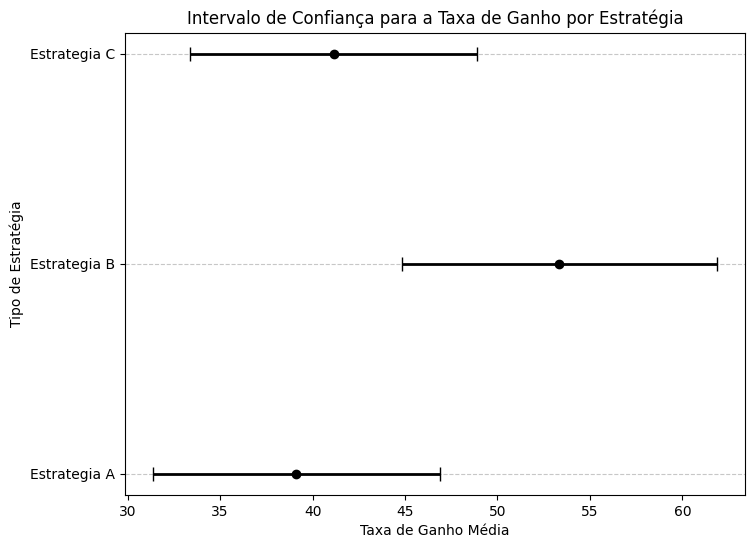

In [48]:
import matplotlib.pyplot as plt

# Dados dos intervalos de confiança
estrategias = ['Estrategia A', 'Estrategia B', 'Estrategia C']
means = [39.13, 53.34, 41.14]  # Médias das taxas de ganho
conf_ints = [(32.38, 47.88), (44.81, 61.86), (33.38, 48.9)]  # Intervalos de confiança

# Calcular o tamanho das barras de erro (meia largura do intervalo de confiança)
errors = [(conf[1] - conf[0]) / 2 for conf in conf_ints]

# Plotar apenas as barras de erro
plt.figure(figsize=(8, 6))
for i, (mean, error) in enumerate(zip(means, errors)):
    plt.errorbar(mean, i, xerr=error, fmt='o', color='black', capsize=5, elinewidth=2)

plt.xlabel('Taxa de Ganho Média')
plt.ylabel('Tipo de Estratégia')
plt.title('Intervalo de Confiança para a Taxa de Ganho por Estratégia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(range(len(estrategias)), estrategias)  # Definir os rótulos do eixo y
plt.show()


## Teste de Hipoteses para testar se há diferença de Taxa de Ganhos entre as estratégias

### Spoiler:
- Há evidências para rejeitar A<B

- Não há evidências para Rejeitar A=C

- Não há evidências para falar C<B